# 📊 Visualizador de Datos Sintéticos - DomusAI

Este notebook permite explorar y visualizar los datos sintéticos generados por el sistema DomusAI.

**Funcionalidades**:
- 📁 Carga de archivos CSV desde `output/`
- 📊 Visualización en tablas interactivas
- 📈 Gráficas de consumo energético
- 🔍 Análisis estadístico completo
- ⚙️ Filtrado y exploración de datos

---

## 1️⃣ Import Required Libraries

Importamos las librerías necesarias para análisis y visualización de datos.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings

# Configuración de visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuración de pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print("✅ Librerías importadas correctamente")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ Librerías importadas correctamente
📦 Pandas version: 2.3.2
📦 NumPy version: 1.26.4


## 2️⃣ Listar Archivos Disponibles

Exploramos los archivos CSV generados en la carpeta `output/`.

In [37]:
# Listar archivos CSV en la carpeta output/
output_dir = Path('output')
csv_files = sorted(output_dir.glob('*.csv'), key=lambda x: x.stat().st_mtime, reverse=True)

print("📁 Archivos CSV disponibles:\n")
print("=" * 80)
for i, file in enumerate(csv_files, 1):
    size_kb = file.stat().st_size / 1024
    mod_time = datetime.fromtimestamp(file.stat().st_mtime).strftime('%Y-%m-%d %H:%M:%S')
    print(f"{i}. {file.name}")
    print(f"   Tamaño: {size_kb:.1f} KB | Modificado: {mod_time}")
    print("-" * 80)

if csv_files:
    print(f"\n✅ Total de archivos encontrados: {len(csv_files)}")
    latest_file = csv_files[0]
    print(f"📄 Archivo más reciente: {latest_file.name}")
else:
    print("⚠️  No se encontraron archivos CSV")

📁 Archivos CSV disponibles:

1. synthetic_1460days_20251101_193442.csv
   Tamaño: 128107.1 KB | Modificado: 2025-11-01 19:34:56
--------------------------------------------------------------------------------

✅ Total de archivos encontrados: 1
📄 Archivo más reciente: synthetic_1460days_20251101_193442.csv


## 3️⃣ Cargar Datos

Cargamos el archivo CSV más reciente y lo convertimos en un DataFrame de pandas.

In [38]:
# Cargar el archivo más reciente (o puedes especificar uno manualmente)
if csv_files:
    # Opción 1: Usar el archivo más reciente
    file_to_load = csv_files[0]
    
    # Opción 2: Descomentar para cargar un archivo específico
    # file_to_load = output_dir / 'synthetic_7days_20251029_122114.csv'
    
    print(f"🔄 Cargando: {file_to_load.name}")
    df = pd.read_csv(file_to_load)
    
    # Convertir Datetime a índice
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df.set_index('Datetime', inplace=True)
    
    print(f"✅ Datos cargados exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"📅 Rango de fechas: {df.index.min()} → {df.index.max()}")
    print(f"⏱️  Duración: {(df.index.max() - df.index.min()).days + 1} días")
else:
    print("❌ No hay archivos para cargar")

🔄 Cargando: synthetic_1460days_20251101_193442.csv
✅ Datos cargados exitosamente
📊 Dimensiones: 2,102,400 filas × 7 columnas
📅 Rango de fechas: 2025-10-30 00:00:00 → 2029-10-28 23:59:00
⏱️  Duración: 1460 días
✅ Datos cargados exitosamente
📊 Dimensiones: 2,102,400 filas × 7 columnas
📅 Rango de fechas: 2025-10-30 00:00:00 → 2029-10-28 23:59:00
⏱️  Duración: 1460 días


In [39]:
# Mostrar las primeras 10 filas
print("📋 Primeras 10 filas del dataset:\n")
print("=" * 120)
display(df.head(10))

print("\n" + "=" * 120)
print("\n📋 Últimas 10 filas del dataset:\n")
print("=" * 120)
display(df.tail(10))

📋 Primeras 10 filas del dataset:



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2025-10-30 00:00:00,0.100,0.053,235.431,0.461,0.025,0.020,0.000
2025-10-30 00:01:00,0.100,0.040,233.905,0.418,0.027,0.020,0.000
2025-10-30 00:02:00,0.100,0.040,227.123,0.468,0.024,0.020,0.001
2025-10-30 00:03:00,0.100,0.050,232.779,0.584,0.035,0.019,0.001
2025-10-30 00:04:00,0.100,0.053,234.484,0.480,0.035,0.020,0.001
2025-10-30 00:05:00,0.100,0.061,230.905,0.596,0.033,0.020,0.001
2025-10-30 00:06:00,0.100,0.041,225.081,0.482,0.031,0.020,0.001
2025-10-30 00:07:00,0.100,0.041,233.172,0.515,0.024,0.020,0.001
2025-10-30 00:08:00,0.100,0.050,231.224,0.362,0.034,0.020,0.001




📋 Últimas 10 filas del dataset:



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2029-10-28 23:50:00,0.403,0.169,225.936,1.930,0.066,0.020,0.012
2029-10-28 23:51:00,0.410,0.224,235.114,1.922,0.055,0.020,0.013
2029-10-28 23:52:00,0.520,0.266,234.430,2.449,0.054,0.020,0.016
2029-10-28 23:53:00,0.409,0.207,229.493,1.936,0.059,0.020,0.013
2029-10-28 23:54:00,0.472,0.176,227.875,2.383,0.063,0.020,0.011
2029-10-28 23:55:00,0.392,0.189,234.951,1.844,0.046,0.020,0.009
2029-10-28 23:56:00,0.431,0.179,231.655,2.090,0.065,0.020,0.010
2029-10-28 23:57:00,0.463,0.260,229.054,2.264,0.066,0.020,0.014
2029-10-28 23:58:00,0.477,0.230,228.682,2.315,0.052,0.020,0.014


In [40]:
# Información general del DataFrame
print("🔍 Información del DataFrame:\n")
print("=" * 80)
df.info()
print("\n" + "=" * 80)
print(f"\n💾 Memoria total utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

🔍 Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2102400 entries, 2025-10-30 00:00:00 to 2029-10-28 23:59:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 128.3 MB


💾 Memoria total utilizada: 131400.00 KB


In [41]:
# Estadísticas descriptivas (transpuestas para mejor lectura)
print("📊 Estadísticas descriptivas del dataset:\n")
print("=" * 120)
stats = df.describe().T
stats['range'] = stats['max'] - stats['min']
display(stats)

print("\n🔍 Observaciones:")
print(f"  • Global_active_power promedio: {df['Global_active_power'].mean():.3f} kW")
print(f"  • Voltaje promedio: {df['Voltage'].mean():.2f} V")
print(f"  • Intensidad promedio: {df['Global_intensity'].mean():.3f} A")
print(f"  • Suma promedio sub-meterings: {(df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']).mean():.3f} kW")

📊 Estadísticas descriptivas del dataset:



,count,mean,std,min,25%,50%,75%,max,range
Global_active_power,2102400.000,0.442,0.592,0.100,0.100,0.136,0.752,7.000,6.900
Global_reactive_power,2102400.000,0.213,0.292,0.030,0.049,0.066,0.338,4.722,4.692
Voltage,2102400.000,230.021,2.447,225.000,228.317,230.003,231.685,238.000,13.000
Global_intensity,2102400.000,2.135,2.860,0.226,0.491,0.662,3.630,34.539,34.313
Sub_metering_1,2102400.000,0.068,0.070,0.024,0.032,0.041,0.072,1.422,1.398
Sub_metering_2,2102400.000,0.026,0.045,0.014,0.020,0.020,0.020,2.074,2.060
Sub_metering_3,2102400.000,0.027,0.052,0.000,0.001,0.006,0.027,1.355,1.355



🔍 Observaciones:
  • Global_active_power promedio: 0.442 kW
  • Voltaje promedio: 230.02 V
  • Intensidad promedio: 2.135 A
  • Suma promedio sub-meterings: 0.122 kW


In [42]:
# Ejemplo 1: Filtrar por consumo alto (>5 kW)
print("🔥 Registros con consumo alto (>5 kW):\n")
high_consumption = df[df['Global_active_power'] > 5.0]
print(f"Total registros: {len(high_consumption):,} ({len(high_consumption)/len(df)*100:.2f}%)")
print("\n" + "=" * 120)
display(high_consumption[['Global_active_power', 'Voltage', 'Global_intensity', 
                          'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].head(10))

# Ejemplo 2: Filtrar por voltaje anormal (<225V o >240V)
print("\n⚠️  Registros con voltaje anormal:\n")
abnormal_voltage = df[(df['Voltage'] < 225) | (df['Voltage'] > 240)]
print(f"Total registros: {len(abnormal_voltage):,} ({len(abnormal_voltage)/len(df)*100:.2f}%)")
if len(abnormal_voltage) > 0:
    print("=" * 120)
    display(abnormal_voltage[['Voltage', 'Global_active_power']].head(10))

🔥 Registros con consumo alto (>5 kW):

Total registros: 10,470 (0.50%)



,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2025-10-30 00:31:00,5.086,230.150,24.529,0.027,0.020,0.033
2025-10-30 00:54:00,5.206,229.892,25.176,0.034,0.020,0.033
2025-10-30 08:38:00,6.188,233.056,29.509,0.763,0.020,0.329
2025-10-30 08:43:00,6.365,232.756,30.395,0.753,0.020,0.344
2025-10-30 15:00:00,5.955,234.272,28.273,0.645,0.020,0.028
2025-10-30 15:34:00,6.999,229.160,33.858,0.788,0.020,0.043
2025-10-30 16:02:00,6.922,226.386,34.029,0.527,0.020,0.033
2025-10-30 17:20:00,5.510,230.941,26.464,0.159,0.020,0.029
2025-10-30 18:02:00,5.505,230.595,26.518,0.206,0.020,0.035



⚠️  Registros con voltaje anormal:

Total registros: 0 (0.00%)


## 6️⃣ Visualizaciones

Gráficas interactivas para análisis visual de los datos.

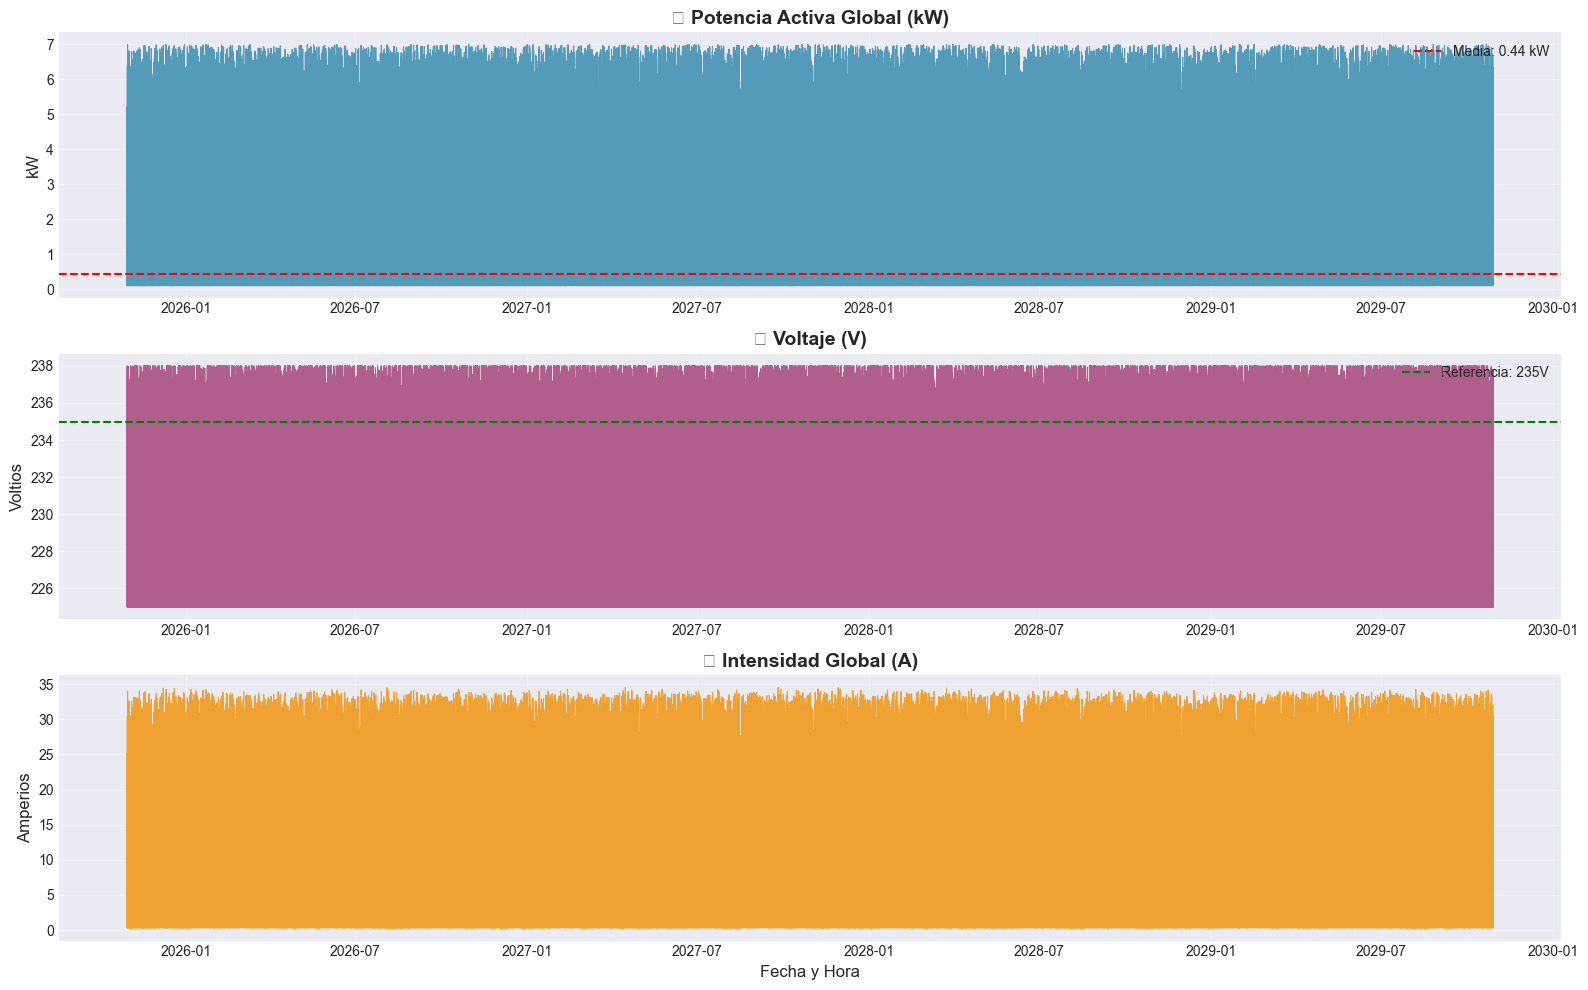

✅ Gráfica de serie temporal generada


In [43]:
# Gráfica de serie temporal del consumo
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Gráfica 1: Global_active_power
axes[0].plot(df.index, df['Global_active_power'], color='#2E86AB', linewidth=0.8, alpha=0.8)
axes[0].set_title('🔌 Potencia Activa Global (kW)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('kW', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=df['Global_active_power'].mean(), color='red', linestyle='--', 
                label=f'Media: {df["Global_active_power"].mean():.2f} kW', linewidth=1.5)
axes[0].legend(loc='upper right')

# Gráfica 2: Voltage
axes[1].plot(df.index, df['Voltage'], color='#A23B72', linewidth=0.8, alpha=0.8)
axes[1].set_title('⚡ Voltaje (V)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Voltios', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=235, color='green', linestyle='--', label='Referencia: 235V', linewidth=1.5)
axes[1].legend(loc='upper right')

# Gráfica 3: Global_intensity
axes[2].plot(df.index, df['Global_intensity'], color='#F18F01', linewidth=0.8, alpha=0.8)
axes[2].set_title('⚡ Intensidad Global (A)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Amperios', fontsize=12)
axes[2].set_xlabel('Fecha y Hora', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Gráfica de serie temporal generada")

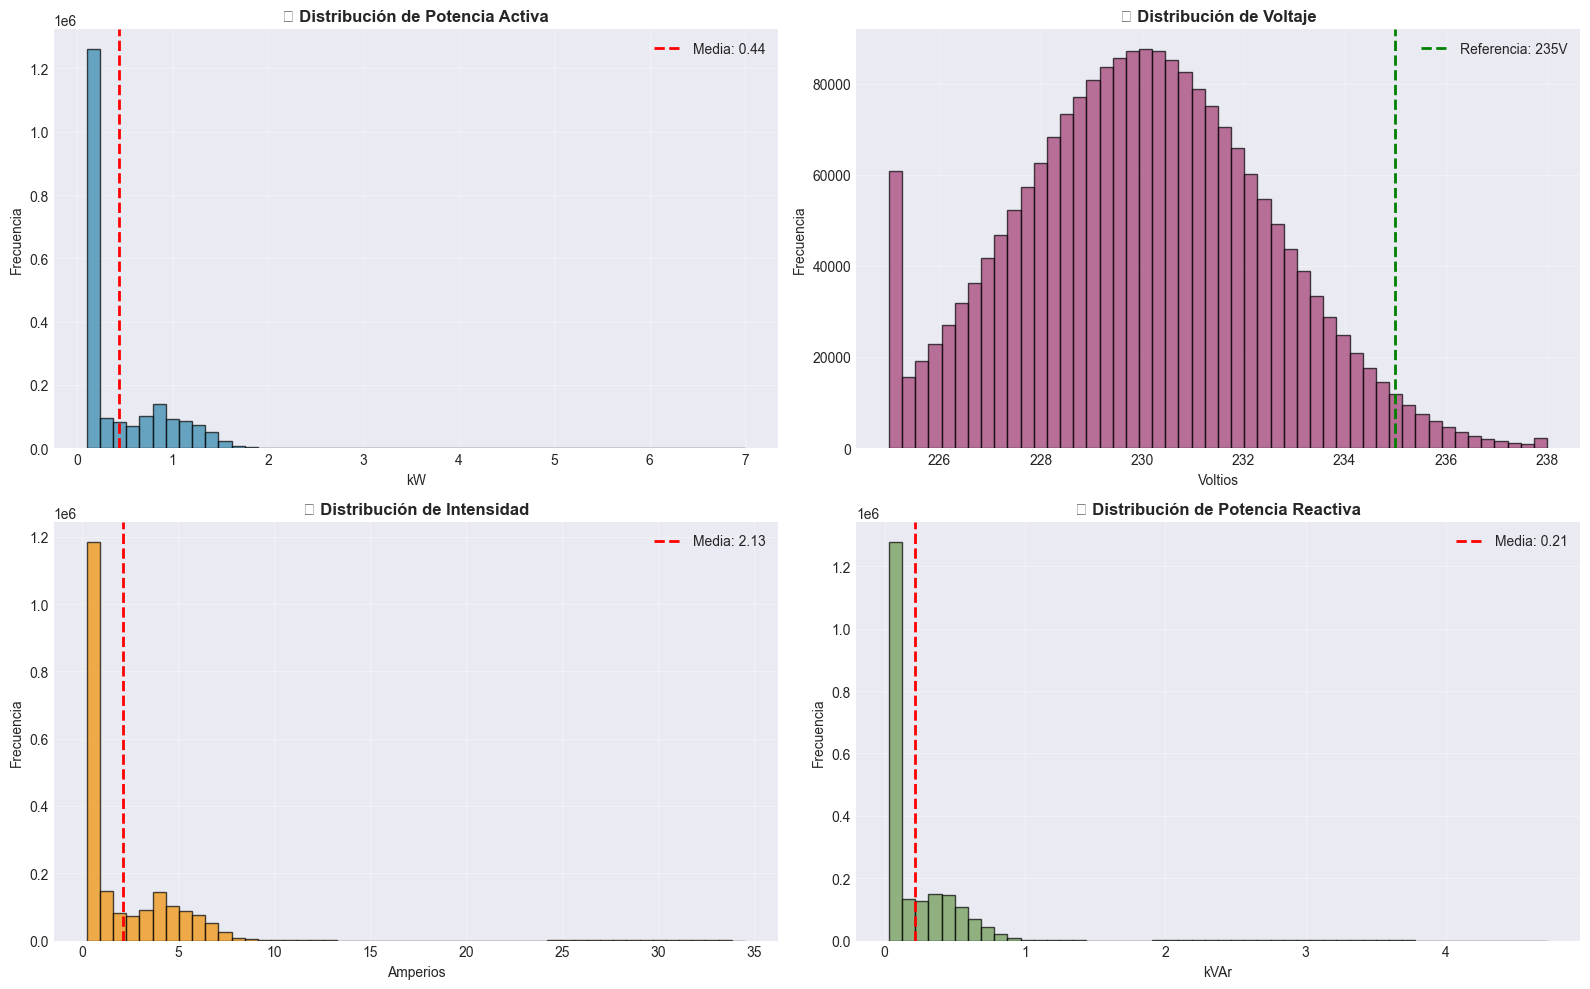

✅ Histogramas generados


In [44]:
# Histogramas de las variables principales
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histograma 1: Global_active_power
axes[0, 0].hist(df['Global_active_power'], bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('🔌 Distribución de Potencia Activa', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('kW')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['Global_active_power'].mean(), color='red', linestyle='--', 
                    label=f'Media: {df["Global_active_power"].mean():.2f}', linewidth=2)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Histograma 2: Voltage
axes[0, 1].hist(df['Voltage'], bins=50, color='#A23B72', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('⚡ Distribución de Voltaje', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Voltios')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(235, color='green', linestyle='--', label='Referencia: 235V', linewidth=2)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Histograma 3: Global_intensity
axes[1, 0].hist(df['Global_intensity'], bins=50, color='#F18F01', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('⚡ Distribución de Intensidad', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Amperios')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(df['Global_intensity'].mean(), color='red', linestyle='--', 
                    label=f'Media: {df["Global_intensity"].mean():.2f}', linewidth=2)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Histograma 4: Global_reactive_power
axes[1, 1].hist(df['Global_reactive_power'], bins=50, color='#6A994E', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('🔋 Distribución de Potencia Reactiva', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('kVAr')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].axvline(df['Global_reactive_power'].mean(), color='red', linestyle='--', 
                    label=f'Media: {df["Global_reactive_power"].mean():.2f}', linewidth=2)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Histogramas generados")

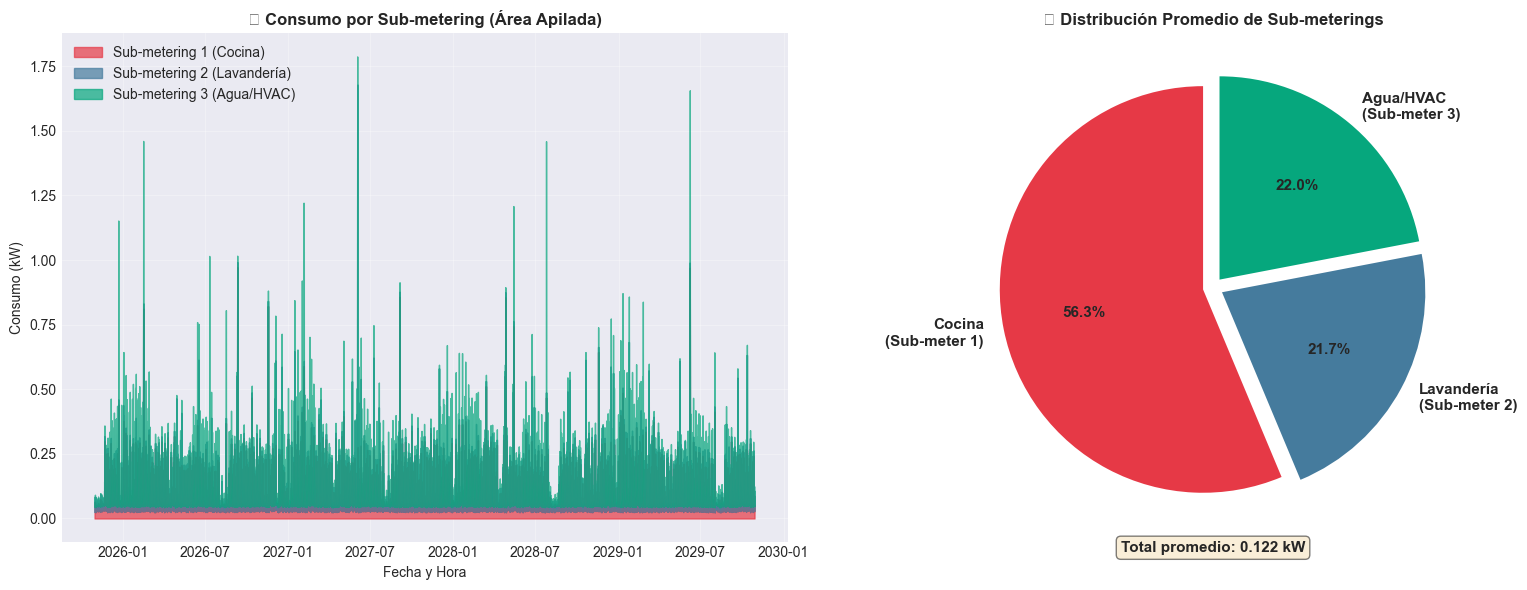

✅ Gráficas de sub-meterings generadas

📊 Resumen de consumo por sub-metering:
  • Cocina (Sub 1): 0.068 kW promedio (56.3%)
  • Lavandería (Sub 2): 0.026 kW promedio (21.7%)
  • Agua/HVAC (Sub 3): 0.027 kW promedio (22.0%)


In [45]:
# Análisis de sub-meterings
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Área apilada de sub-meterings a lo largo del tiempo
# Muestrear para mejorar rendimiento si hay muchos datos
sample_rate = max(1, len(df) // 5000)  # Máximo 5000 puntos
df_sample = df.iloc[::sample_rate]

axes[0].fill_between(df_sample.index, 0, df_sample['Sub_metering_1'], 
                      label='Sub-metering 1 (Cocina)', color='#E63946', alpha=0.7)
axes[0].fill_between(df_sample.index, df_sample['Sub_metering_1'], 
                      df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'],
                      label='Sub-metering 2 (Lavandería)', color='#457B9D', alpha=0.7)
axes[0].fill_between(df_sample.index, 
                      df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'],
                      df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'] + df_sample['Sub_metering_3'],
                      label='Sub-metering 3 (Agua/HVAC)', color='#06A77D', alpha=0.7)

axes[0].set_title('📊 Consumo por Sub-metering (Área Apilada)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fecha y Hora')
axes[0].set_ylabel('Consumo (kW)')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Gráfica 2: Gráfico de pastel con promedios
sub_avg = {
    'Cocina\n(Sub-meter 1)': df['Sub_metering_1'].mean(),
    'Lavandería\n(Sub-meter 2)': df['Sub_metering_2'].mean(),
    'Agua/HVAC\n(Sub-meter 3)': df['Sub_metering_3'].mean()
}

colors_pie = ['#E63946', '#457B9D', '#06A77D']
explode = (0.05, 0.05, 0.05)

wedges, texts, autotexts = axes[1].pie(sub_avg.values(), labels=sub_avg.keys(), 
                                         autopct='%1.1f%%', startangle=90,
                                         colors=colors_pie, explode=explode,
                                         textprops={'fontsize': 11, 'weight': 'bold'})

axes[1].set_title('🍰 Distribución Promedio de Sub-meterings', fontsize=12, fontweight='bold')

# Añadir valores absolutos en el centro
total_sub = sum(sub_avg.values())
axes[1].text(0, -1.3, f'Total promedio: {total_sub:.3f} kW', 
             ha='center', fontsize=11, weight='bold',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Gráficas de sub-meterings generadas")
print(f"\n📊 Resumen de consumo por sub-metering:")
print(f"  • Cocina (Sub 1): {df['Sub_metering_1'].mean():.3f} kW promedio ({df['Sub_metering_1'].mean()/total_sub*100:.1f}%)")
print(f"  • Lavandería (Sub 2): {df['Sub_metering_2'].mean():.3f} kW promedio ({df['Sub_metering_2'].mean()/total_sub*100:.1f}%)")
print(f"  • Agua/HVAC (Sub 3): {df['Sub_metering_3'].mean():.3f} kW promedio ({df['Sub_metering_3'].mean()/total_sub*100:.1f}%)")

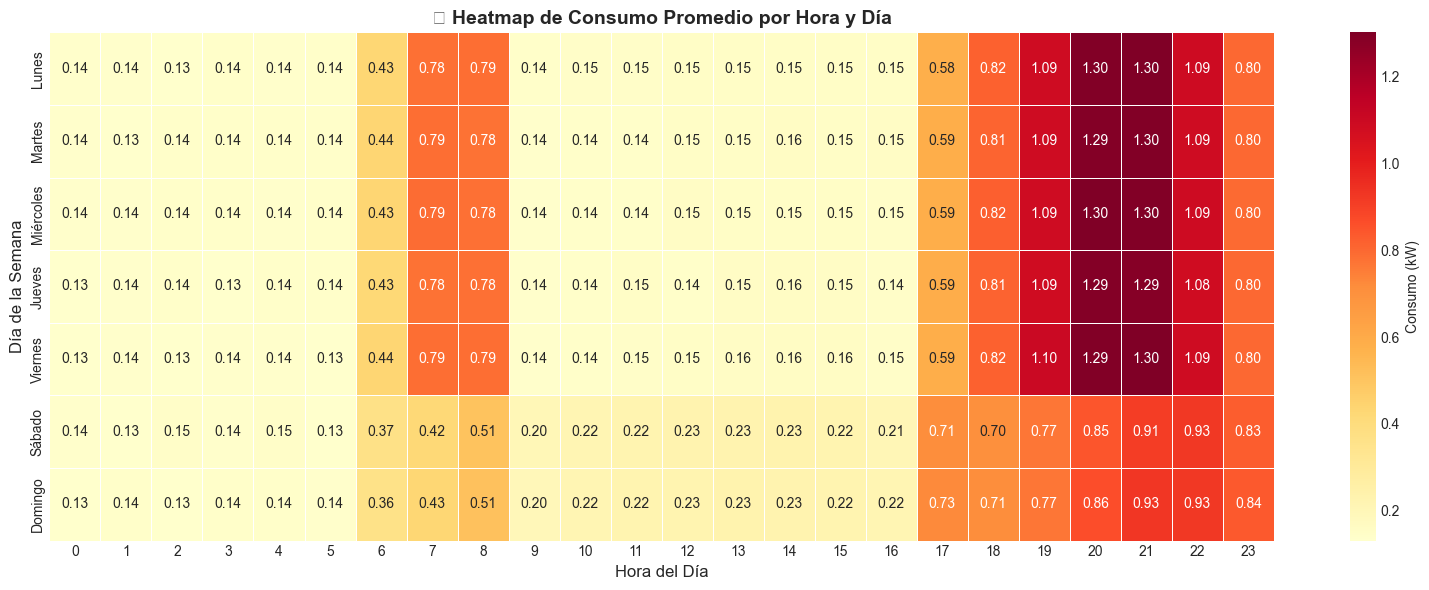

✅ Heatmap de patrones temporales generado

📊 Insights:
  • Hora de mayor consumo promedio: Viernes a las 21:00h
  • Día de mayor consumo promedio: Viernes


In [46]:
# Crear heatmap de consumo por hora del día y día de la semana
df_temp = df.copy()
df_temp['hour'] = df_temp.index.hour
df_temp['day_of_week'] = df_temp.index.dayofweek
df_temp['day_name'] = df_temp.index.day_name()

# Crear tabla pivot
pivot_table = df_temp.pivot_table(
    values='Global_active_power',
    index='day_of_week',
    columns='hour',
    aggfunc='mean'
)

# Nombres de días en español
day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
pivot_table.index = [day_names[i] if i < len(pivot_table) else f'Día {i}' for i in pivot_table.index]

# Crear heatmap
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Consumo (kW)'}, linewidths=0.5, ax=ax)

ax.set_title('🔥 Heatmap de Consumo Promedio por Hora y Día', fontsize=14, fontweight='bold')
ax.set_xlabel('Hora del Día', fontsize=12)
ax.set_ylabel('Día de la Semana', fontsize=12)

plt.tight_layout()
plt.show()

print("✅ Heatmap de patrones temporales generado")
print(f"\n📊 Insights:")
print(f"  • Hora de mayor consumo promedio: {pivot_table.max(axis=1).idxmax()} a las {pivot_table.max().idxmax()}:00h")
print(f"  • Día de mayor consumo promedio: {pivot_table.mean(axis=1).idxmax()}")

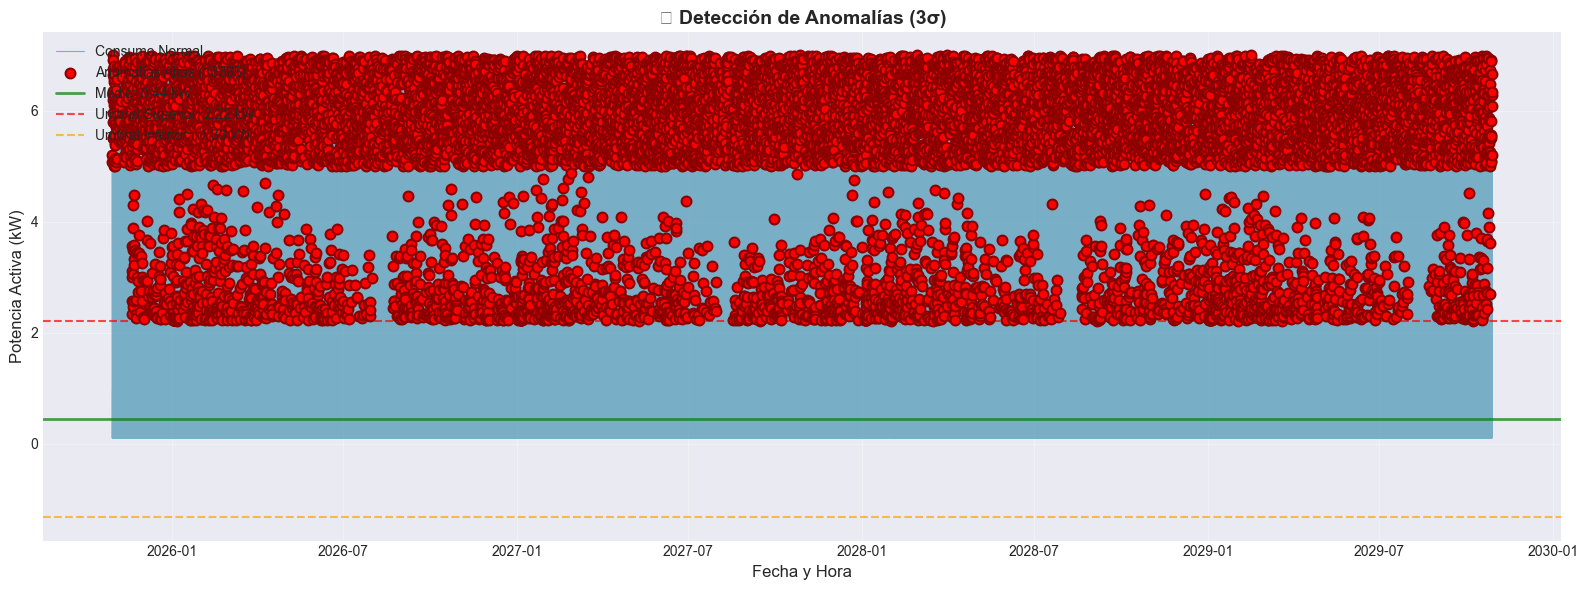

✅ Análisis de anomalías completado

📊 Resumen de anomalías detectadas:
  • Anomalías altas (>2.22 kW): 13365 (0.64%)
  • Anomalías bajas (<-1.33 kW): 0 (0.00%)
  • Total de anomalías: 13365 (0.64%)

🔥 Top 5 consumos más altos:
  • 2028-02-28 08:27:00: 7.000 kW
  • 2029-02-15 16:37:00: 7.000 kW
  • 2025-10-30 15:34:00: 6.999 kW
  • 2027-10-27 17:42:00: 6.999 kW
  • 2028-03-30 17:28:00: 6.999 kW


In [47]:
# Detección simple de anomalías usando desviación estándar
mean_power = df['Global_active_power'].mean()
std_power = df['Global_active_power'].std()

# Definir umbral: 3 desviaciones estándar
threshold_high = mean_power + (3 * std_power)
threshold_low = mean_power - (3 * std_power)

# Identificar anomalías
anomalies_high = df[df['Global_active_power'] > threshold_high]
anomalies_low = df[df['Global_active_power'] < threshold_low]

# Visualizar
fig, ax = plt.subplots(figsize=(16, 6))

# Datos normales
ax.plot(df.index, df['Global_active_power'], color='#2E86AB', 
        linewidth=0.8, alpha=0.6, label='Consumo Normal')

# Resaltar anomalías
if len(anomalies_high) > 0:
    ax.scatter(anomalies_high.index, anomalies_high['Global_active_power'], 
               color='red', s=50, marker='o', label=f'Anomalías Altas ({len(anomalies_high)})', 
               zorder=5, edgecolors='darkred', linewidths=1.5)

if len(anomalies_low) > 0:
    ax.scatter(anomalies_low.index, anomalies_low['Global_active_power'], 
               color='orange', s=50, marker='o', label=f'Anomalías Bajas ({len(anomalies_low)})', 
               zorder=5, edgecolors='darkorange', linewidths=1.5)

# Líneas de umbral
ax.axhline(y=mean_power, color='green', linestyle='-', 
           label=f'Media: {mean_power:.2f} kW', linewidth=2, alpha=0.7)
ax.axhline(y=threshold_high, color='red', linestyle='--', 
           label=f'Umbral Superior: {threshold_high:.2f} kW', linewidth=1.5, alpha=0.7)
ax.axhline(y=threshold_low, color='orange', linestyle='--', 
           label=f'Umbral Inferior: {threshold_low:.2f} kW', linewidth=1.5, alpha=0.7)

ax.set_title('🚨 Detección de Anomalías (3σ)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha y Hora', fontsize=12)
ax.set_ylabel('Potencia Activa (kW)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Análisis de anomalías completado")
print(f"\n📊 Resumen de anomalías detectadas:")
print(f"  • Anomalías altas (>{threshold_high:.2f} kW): {len(anomalies_high)} ({len(anomalies_high)/len(df)*100:.2f}%)")
print(f"  • Anomalías bajas (<{threshold_low:.2f} kW): {len(anomalies_low)} ({len(anomalies_low)/len(df)*100:.2f}%)")
print(f"  • Total de anomalías: {len(anomalies_high) + len(anomalies_low)} ({(len(anomalies_high) + len(anomalies_low))/len(df)*100:.2f}%)")

if len(anomalies_high) > 0:
    print(f"\n🔥 Top 5 consumos más altos:")
    top_5 = anomalies_high.nlargest(5, 'Global_active_power')
    for idx, row in top_5.iterrows():
        print(f"  • {idx}: {row['Global_active_power']:.3f} kW")

In [48]:
# Resumen final del análisis
print("=" * 100)
print("📊 RESUMEN FINAL DEL ANÁLISIS - DomusAI")
print("=" * 100)

print(f"\n📁 Archivo analizado: {file_to_load.name}")
print(f"📅 Período: {df.index.min()} → {df.index.max()}")
print(f"⏱️  Duración: {(df.index.max() - df.index.min()).days + 1} días ({len(df):,} registros)")

print(f"\n🔌 CONSUMO ELÉCTRICO:")
print(f"  • Potencia activa promedio: {df['Global_active_power'].mean():.3f} kW")
print(f"  • Potencia activa máxima: {df['Global_active_power'].max():.3f} kW")
print(f"  • Potencia activa mínima: {df['Global_active_power'].min():.3f} kW")
print(f"  • Desviación estándar: {df['Global_active_power'].std():.3f} kW")

# Calcular consumo total (integración numérica aproximada)
# Asumiendo intervalos de 1 minuto
interval_hours = 1/60  # 1 minuto = 1/60 hora
total_kwh = (df['Global_active_power'].sum() * interval_hours)
print(f"  • Consumo total estimado: {total_kwh:.2f} kWh")

print(f"\n⚡ PARÁMETROS ELÉCTRICOS:")
print(f"  • Voltaje promedio: {df['Voltage'].mean():.2f} V")
print(f"  • Intensidad promedio: {df['Global_intensity'].mean():.3f} A")
print(f"  • Potencia reactiva promedio: {df['Global_reactive_power'].mean():.3f} kVAr")

print(f"\n📊 SUB-METERINGS (kW):")
total_sub = (df['Sub_metering_1'].mean() + df['Sub_metering_2'].mean() + df['Sub_metering_3'].mean())
print(f"  • Cocina (Sub-meter 1): {df['Sub_metering_1'].mean():.3f} kW ({df['Sub_metering_1'].mean()/total_sub*100:.1f}%)")
print(f"  • Lavandería (Sub-meter 2): {df['Sub_metering_2'].mean():.3f} kW ({df['Sub_metering_2'].mean()/total_sub*100:.1f}%)")
print(f"  • Agua/HVAC (Sub-meter 3): {df['Sub_metering_3'].mean():.3f} kW ({df['Sub_metering_3'].mean()/total_sub*100:.1f}%)")
print(f"  • Total sub-meterings: {total_sub:.3f} kW")
print(f"  • Porcentaje del consumo total: {total_sub/df['Global_active_power'].mean()*100:.1f}%")

print(f"\n🚨 ANOMALÍAS DETECTADAS:")
print(f"  • Anomalías altas: {len(anomalies_high)} registros ({len(anomalies_high)/len(df)*100:.2f}%)")
print(f"  • Anomalías bajas: {len(anomalies_low)} registros ({len(anomalies_low)/len(df)*100:.2f}%)")

print(f"\n⏰ PATRONES TEMPORALES:")
hourly_consumption = df.groupby(df.index.hour)['Global_active_power'].mean()
peak_hour = hourly_consumption.idxmax()
low_hour = hourly_consumption.idxmin()
print(f"  • Hora pico de consumo: {peak_hour}:00h ({hourly_consumption.max():.3f} kW)")
print(f"  • Hora de mínimo consumo: {low_hour}:00h ({hourly_consumption.min():.3f} kW)")

print("\n" + "=" * 100)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 100)

📊 RESUMEN FINAL DEL ANÁLISIS - DomusAI

📁 Archivo analizado: synthetic_1460days_20251101_193442.csv
📅 Período: 2025-10-30 00:00:00 → 2029-10-28 23:59:00
⏱️  Duración: 1460 días (2,102,400 registros)

🔌 CONSUMO ELÉCTRICO:
  • Potencia activa promedio: 0.442 kW
  • Potencia activa máxima: 7.000 kW
  • Potencia activa mínima: 0.100 kW
  • Desviación estándar: 0.592 kW
  • Consumo total estimado: 15483.13 kWh

⚡ PARÁMETROS ELÉCTRICOS:
  • Voltaje promedio: 230.02 V
  • Intensidad promedio: 2.135 A
  • Potencia reactiva promedio: 0.213 kVAr

📊 SUB-METERINGS (kW):
  • Cocina (Sub-meter 1): 0.068 kW (56.3%)
  • Lavandería (Sub-meter 2): 0.026 kW (21.7%)
  • Agua/HVAC (Sub-meter 3): 0.027 kW (22.0%)
  • Total sub-meterings: 0.122 kW
  • Porcentaje del consumo total: 27.5%

🚨 ANOMALÍAS DETECTADAS:
  • Anomalías altas: 13365 registros (0.64%)
  • Anomalías bajas: 0 registros (0.00%)

⏰ PATRONES TEMPORALES:
  • Hora pico de consumo: 21:00h (1.189 kW)
  • Hora de mínimo consumo: 0:00h (0.136 kW)



## 7️⃣ Resumen Final

Conclusiones y métricas clave del análisis.

### 🔍 Detección de Anomalías Visuales

Identificación visual de posibles anomalías en el consumo.

### ⏰ Patrones Temporales (Heatmap por Hora)

### 🍰 Desglose de Sub-meterings

### 📊 Distribuciones y Histogramas

### 📈 Serie Temporal de Consumo

In [13]:
# Ejemplo 3: Análisis por hora del día
print("⏰ Consumo promedio por hora del día:\n")
df_hourly = df.copy()
df_hourly['hour'] = df_hourly.index.hour
hourly_avg = df_hourly.groupby('hour')['Global_active_power'].mean().sort_index()

print("=" * 80)
for hour, consumption in hourly_avg.items():
    bar_length = int(consumption * 10)
    bar = '█' * bar_length
    print(f"{hour:02d}:00 | {bar} {consumption:.3f} kW")
print("=" * 80)

print(f"\n🔝 Pico de consumo: {hourly_avg.idxmax()}:00h ({hourly_avg.max():.3f} kW)")
print(f"🔽 Mínimo consumo: {hourly_avg.idxmin()}:00h ({hourly_avg.min():.3f} kW)")

⏰ Consumo promedio por hora del día:

00:00 | ██ 0.245 kW
01:00 | ██ 0.246 kW
02:00 | ██ 0.245 kW
03:00 | ██ 0.248 kW
04:00 | ██ 0.245 kW
05:00 | ██ 0.246 kW
06:00 | ███████████████ 1.585 kW
07:00 | ██████████████████████████ 2.619 kW
08:00 | ███████████████████████████ 2.720 kW
09:00 | ██████ 0.620 kW
10:00 | █████████ 0.911 kW
11:00 | █████████ 0.948 kW
12:00 | ██████████ 1.022 kW
13:00 | ███████████ 1.124 kW
14:00 | ███████████ 1.179 kW
15:00 | ███████████ 1.114 kW
16:00 | █████████ 0.986 kW
17:00 | ████████████████████████████ 2.878 kW
18:00 | ████████████████████████████████████ 3.634 kW
19:00 | ██████████████████████████████████████████████ 4.640 kW
20:00 | ██████████████████████████████████████████████████████ 5.442 kW
21:00 | ███████████████████████████████████████████████████████ 5.516 kW
22:00 | ████████████████████████████████████████████████ 4.845 kW
23:00 | ███████████████████████████████████ 3.570 kW

🔝 Pico de consumo: 21:00h (5.516 kW)
🔽 Mínimo consumo: 4:00h (0.245 kW)

### 📅 Consumo de un Mes Específico

Vista detallada del consumo de un mes completo para analizar patrones semanales y diarios.

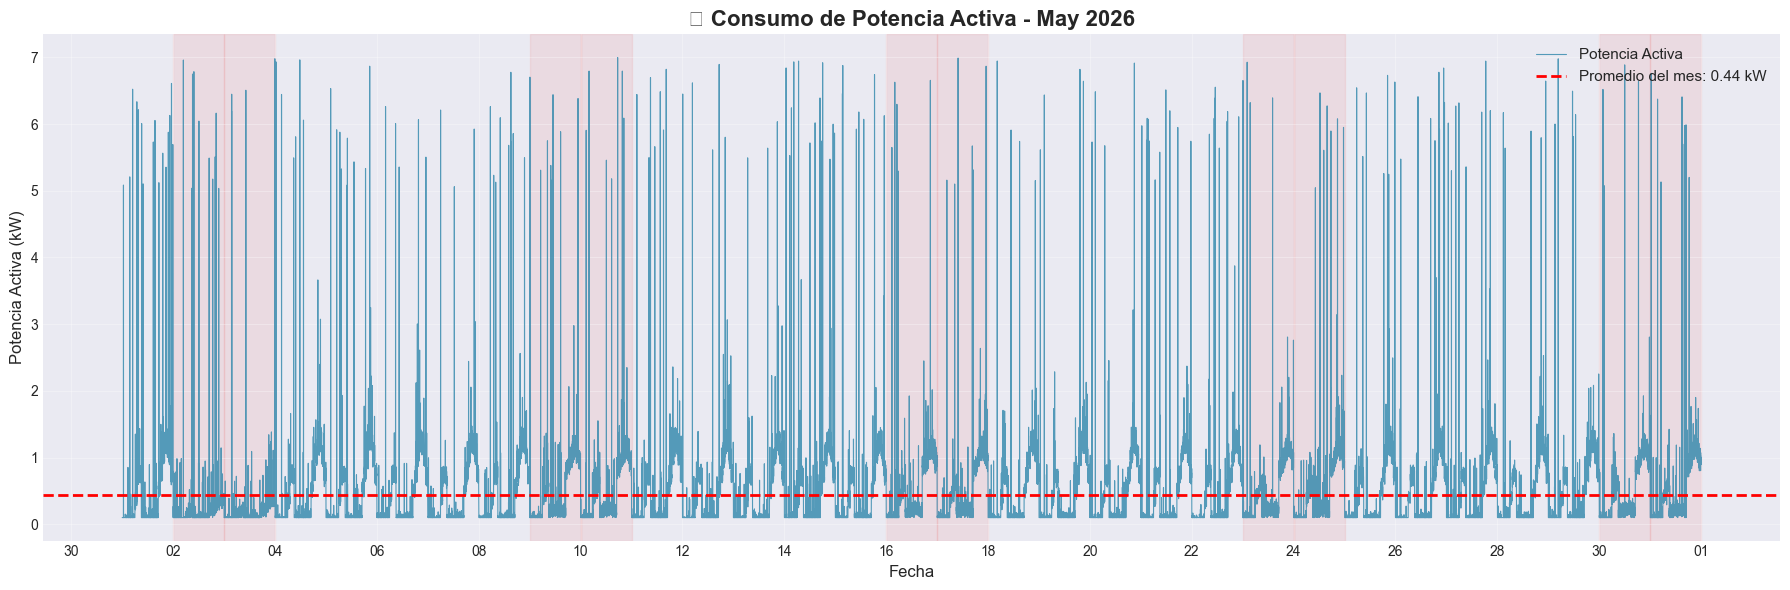

✅ Gráfica de May 2026 generada

📊 Estadísticas del mes:
  • Total de registros: 44,640
  • Consumo promedio: 0.445 kW
  • Consumo mínimo: 0.100 kW
  • Consumo máximo: 6.998 kW
  • Desviación estándar: 0.566 kW

📅 Consumo promedio por día de la semana en May:
  • Lunes: 0.448 kW
  • Martes: 0.449 kW
  • Miércoles: 0.443 kW
  • Jueves: 0.456 kW
  • Viernes: 0.458 kW
  • Sábado: 0.431 kW
  • Domingo: 0.432 kW

📌 Nota: Las franjas rojas claras indican fines de semana


In [57]:
# Seleccionar un mes específico para análisis detallado
# Puedes cambiar el año y mes según tus necesidades
year_to_plot = 2026  # Cambiar según el año que quieras ver
month_to_plot = 5    # Cambiar según el mes (1-12)

# Filtrar datos de ese mes
df_month = df[(df.index.year == year_to_plot) & (df.index.month == month_to_plot)].copy()

if len(df_month) > 0:
    # Crear gráfica detallada del mes
    fig, ax = plt.subplots(figsize=(18, 6))
    
    # Graficar la potencia activa del mes
    ax.plot(df_month.index, df_month['Global_active_power'], 
            color='#2E86AB', linewidth=0.8, alpha=0.8, label='Potencia Activa')
    
    # Resaltar fines de semana con franjas verticales
    for day in df_month.index.normalize().unique():
        if day.dayofweek >= 5:  # Sábado o Domingo
            ax.axvspan(day, day + pd.Timedelta(days=1), 
                      color='lightcoral', alpha=0.15, zorder=0)
    
    # Línea de promedio del mes
    monthly_avg = df_month['Global_active_power'].mean()
    ax.axhline(y=monthly_avg, color='red', linestyle='--', 
              label=f'Promedio del mes: {monthly_avg:.2f} kW', linewidth=2)
    
    # Configuración de la gráfica
    month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                   'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    ax.set_title(f'📅 Consumo de Potencia Activa - {month_names[month_to_plot-1]} {year_to_plot}', 
                fontsize=16, fontweight='bold')
    ax.set_xlabel('Fecha', fontsize=12)
    ax.set_ylabel('Potencia Activa (kW)', fontsize=12)
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Formato del eje X para mostrar días
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas del mes
    print(f"✅ Gráfica de {month_names[month_to_plot-1]} {year_to_plot} generada")
    print(f"\n📊 Estadísticas del mes:")
    print(f"  • Total de registros: {len(df_month):,}")
    print(f"  • Consumo promedio: {df_month['Global_active_power'].mean():.3f} kW")
    print(f"  • Consumo mínimo: {df_month['Global_active_power'].min():.3f} kW")
    print(f"  • Consumo máximo: {df_month['Global_active_power'].max():.3f} kW")
    print(f"  • Desviación estándar: {df_month['Global_active_power'].std():.3f} kW")
    
    # Consumo por día de la semana en ese mes
    df_month['day_of_week'] = df_month.index.dayofweek
    weekly_avg_month = df_month.groupby('day_of_week')['Global_active_power'].mean()
    
    print(f"\n📅 Consumo promedio por día de la semana en {month_names[month_to_plot-1]}:")
    days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    for day_num, consumption in weekly_avg_month.items():
        print(f"  • {days[day_num]}: {consumption:.3f} kW")
    
    # Destacar franjas de fines de semana
    print(f"\n📌 Nota: Las franjas rojas claras indican fines de semana")
else:
    print(f"❌ No hay datos para {month_names[month_to_plot-1]} {year_to_plot}")
    print(f"   Rango de datos disponible: {df.index.min()} → {df.index.max()}")

## 5️⃣ Filtrar y Analizar Datos

Ejemplos de cómo filtrar y analizar subconjuntos de datos.

### 📈 Estadísticas Descriptivas

### 📊 Información del Dataset

## 4️⃣ Visualizar Datos en Tabla

Mostramos las primeras y últimas filas del dataset para inspección visual.